In [1]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

import exactdiago as ex
import infiniteDMRG as id

### $\lambda = 0$

I study the case when $\lambda = 0$, computing the ground state energy and looking if they follow the expected behaviour of $E_g = -(N-1)$. A discrepacy between the theoretical and computed value can be thought as a measure of error.

In [2]:
l = 0       # lambda value of the trasverse field
m_max = 1   # Maximum number of states to retain during truncation
convergence_threshold = 0  # Threshold value for the Infinite-DMRG algorithm
max_iterations = 20        # Number of iterations of the algorithm; each completed iteration adds 2 sites 2m -> 2m+2 and consequently 
                           # the dimension of the Hamiltonian H_2m+2 (before the truncation) 2**2m -> 2**2m+2

# I run the RSRG algorithm
normgs_eigval_dict, eigvec, deltas_dim, actual_dim = id.dmrg(l, m_max, convergence_threshold, max_iterations)

# normgs_eigval_dict: is the dictionary of the normalized eigenvalues for each dimension in the iteration
# eigvec: is the first eigenvector of the last hamiltonian
# deltas_dim: is the list of deltas for each dimension in the iteration
# actual_dim: is the final dimension reached

# I compute the Non-Normalized GS energies by multipling again for the current value of N
gs_eigval = {N: N * en for N, en in normgs_eigval_dict.items()}

# I compute the expected behaviour for the Non-Normalized GS energies, using the above-mentioned formula
theoretical_eigval = {N: -(N-1) for N in normgs_eigval_dict.keys()}

# I compute the relative error between the computed and expected values of the Non-Normalized GS energies
error_eigval = {N: np.abs((gs_eigval[N] - theoretical_eigval[N])/theoretical_eigval[N]) for N in normgs_eigval_dict.keys()}

Starting iteration 0 ...
Starting iteration 10 ...
Reached N = 42 with precision: delta = 0.0011904761904760752


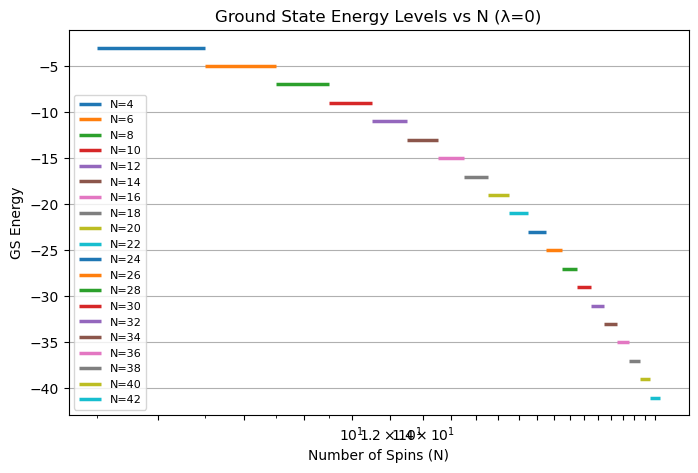

In [3]:
plt.figure(figsize=(8, 5))

id.plot_dict_N_GSen(gs_eigval, "hlines")

plt.xscale('log')
plt.xticks(list(gs_eigval.keys()))
plt.xlabel('Number of Spins (N)')
plt.ylabel('GS Energy')
plt.title(f'Ground State Energy Levels vs N (λ=0)')
plt.legend(loc='lower left', fontsize = 8)
plt.grid(axis='y')
plt.show()

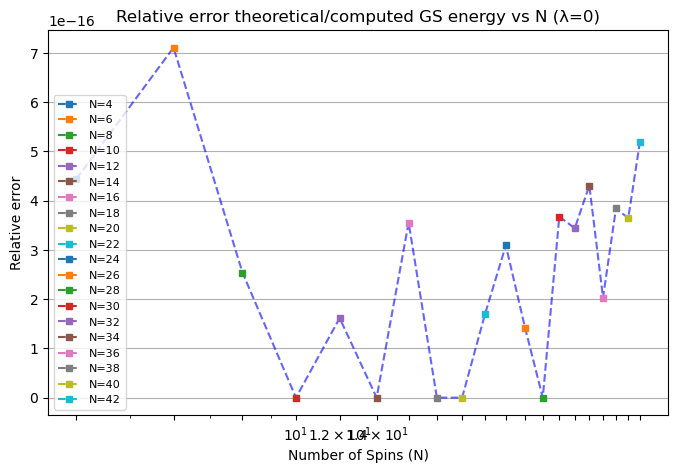

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(list(error_eigval.keys()),list(error_eigval.values()), "--", color = "blue", alpha = 0.6)

id.plot_dict_N_GSen(error_eigval, "plot")

plt.xscale('log')
plt.xticks(list(error_eigval.keys())) 
plt.xlabel('Number of Spins (N)')
plt.ylabel('Relative error')
plt.title(f'Relative error theoretical/computed GS energy vs N (λ=0)')
plt.legend(loc='lower left', fontsize = 8)
plt.grid(axis='y')
plt.show()

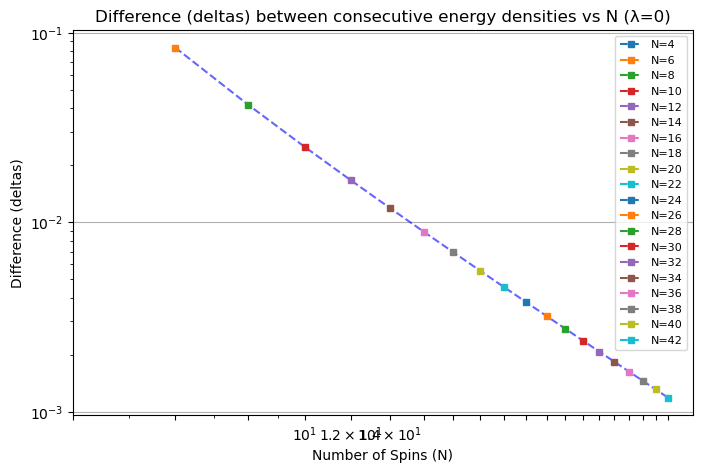

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(list(deltas_dim.keys()),list(deltas_dim.values()), "--", color = "blue", alpha = 0.6)

id.plot_dict_N_GSen(deltas_dim, "plot")

plt.xscale('log')
plt.yscale('log')
plt.xticks(list(deltas_dim.keys())) 
plt.xlabel('Number of Spins (N)')
plt.ylabel('Difference (deltas)')
plt.title(f'Difference (deltas) between consecutive energy densities vs N (λ=0)')
plt.legend(loc='upper right', fontsize = 8)
plt.grid(axis='y')
plt.show()

In these graphs we have compared the computed values of the ground state energies provided by the algorithm with the theoretical expectation value with lambda = 0. The relative error has very low values.

### $\lambda \rightarrow \infty$

We can perform the same reasoning comparing the results provided by the RSRG with the theoretical ground state energy in this regime, namely $E_g = - \lambda \cdot N$.

In [10]:
l = 10000  # lambda value of the trasverse field
m_max = 1  # Maximum number of states to retain during truncation
convergence_threshold = 0  # Threshold value for the Infinite-DMRG algorithm
max_iterations = 50        # Number of iterations of the algorithm; each completed iteration adds 2 sites 2m -> 2m+2 and consequently 
                                # the dimension of the Hamiltonian H_2m+2 (before the truncation) 2**2m -> 2**2m+2

# I run the RSRG algorithm
normgs_eigval_dict, eigvec, deltas_dim, actual_dim = id.dmrg(l, m_max, convergence_threshold, max_iterations)

# normgs_eigval_dict: is the dictionary of the normalized eigenvalues for each dimension in the iteration
# eigvec: is the first eigenvector of the last hamiltonian
# deltas_dim: is the list of deltas for each dimension in the iteration
# actual_dim: is the final dimension reached

# I compute the Non-Normalized GS energies by multipling again for the current value of N
gs_eigval = {N: N * en for N, en in normgs_eigval_dict.items()}

# I compute the expected behaviour for the Non-Normalized GS energies, using the above-mentioned formula
theoretical_eigval = {N: -(l*N) for N in normgs_eigval_dict.keys()}

# I compute the relative error between the computed and expected values of the Non-Normalized GS energies
error_eigval = {N: np.abs((gs_eigval[N] - theoretical_eigval[N])/theoretical_eigval[N]) for N in normgs_eigval_dict.keys()}

Starting iteration 0 ...
Starting iteration 10 ...
Starting iteration 20 ...
Starting iteration 30 ...
Starting iteration 40 ...
Reached N = 102 with precision: delta = 4.900357453152537e-09


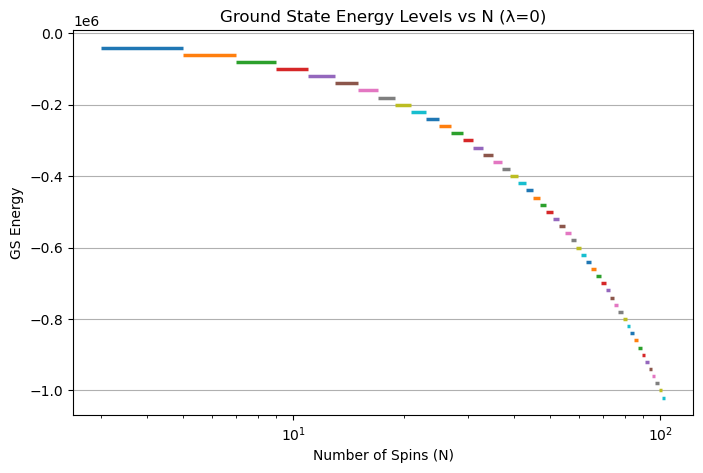

In [13]:
plt.figure(figsize=(8, 5))

id.plot_dict_N_GSen(gs_eigval, "hlines")

plt.xscale('log')
# plt.xticks(list(gs_eigval.keys()))
plt.xlabel('Number of Spins (N)')
plt.ylabel('GS Energy')
plt.title(f'Ground State Energy Levels vs N (λ=$\infty$)')
# plt.legend(loc='lower left', fontsize = 8)
plt.grid(axis='y')
plt.show()

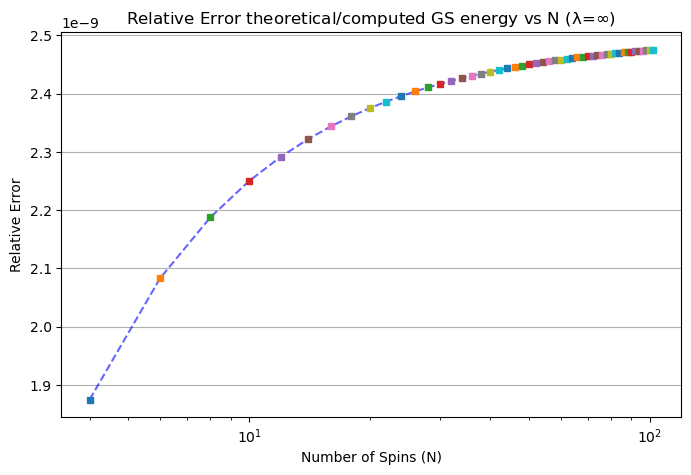

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(list(error_eigval.keys()),list(error_eigval.values()), "--", color = "blue", alpha = 0.6)

id.plot_dict_N_GSen(error_eigval, "plot")

plt.xscale('log')
# plt.xticks(list(error_eigval.keys()))   
plt.xlabel('Number of Spins (N)')
plt.ylabel('Relative Error')
plt.title(f'Relative Error theoretical/computed GS energy vs N (λ=$\infty$)')
plt.grid(axis='y')
plt.show()

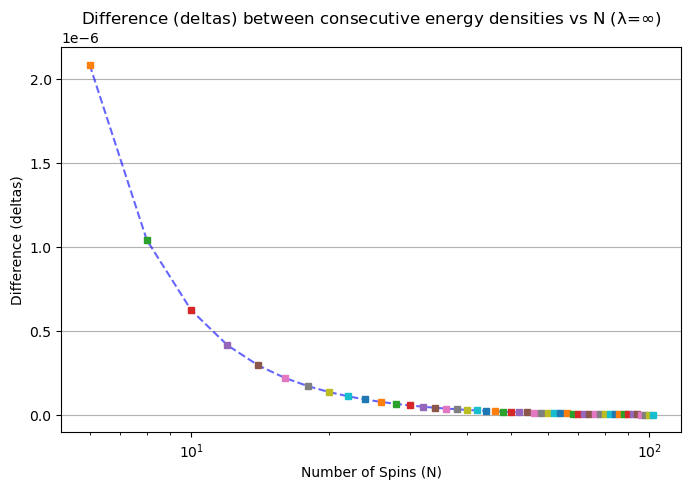

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(list(deltas_dim.keys()),list(deltas_dim.values()), "--", color = "blue", alpha = 0.6)

id.plot_dict_N_GSen(deltas_dim, "plot")

plt.xscale('log')
# plt.xticks(list(deltas_dim.keys()))   
plt.xlabel('Number of Spins (N)')
plt.ylabel('Difference (deltas)')
plt.title(f'Difference (deltas) between consecutive energy densities vs N (λ=$\infty$)')
# plt.legend(loc='upper right')
plt.grid(axis='y')
plt.show()

Ground State density energies versus the dimension N of the system. should be decreasing over N

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Starting iteration 0 ...
Starting iteration 10 ...
Starting iteration 20 ...
Starting iteration 30 ...
Starting iteration 40 ...
Reached N = 102 with precision: delta = 6.321879654658247e-05


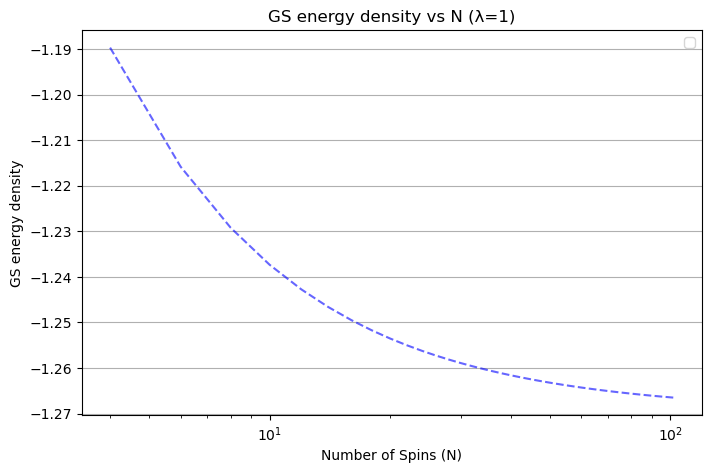

In [20]:
l = 1      # lambda value of the trasverse field
m_max = 1  # Maximum number of states to retain during truncation
convergence_threshold = 0  # Threshold value for the Infinite-DMRG algorithm
max_iterations = 50        # Number of iterations of the algorithm; each completed iteration adds 2 sites 2m -> 2m+2 and consequently 
                                # the dimension of the Hamiltonian H_2m+2 (before the truncation) 2**2m -> 2**2m+2

# I run the RSRG algorithm
normgs_eigval_dict, eigvec, deltas_dim, actual_dim = id.dmrg(l, m_max, convergence_threshold, max_iterations)

# normgs_eigval_dict: is the dictionary of the normalized eigenvalues for each dimension in the iteration

plt.figure(figsize=(8, 5))

plt.plot(list(normgs_eigval_dict.keys()),list(normgs_eigval_dict.values()), "--", color = "blue", alpha = 0.6)
plt.xscale('log')
plt.xlabel('Number of Spins (N)')
plt.ylabel('GS energy density')
plt.title(f'GS energy density vs N (λ={l})')
plt.legend(loc='upper right')
plt.grid(axis='y')

plt.show()

### Comparison Infinite-DMRG with the Exact Diagonalization

I compare the results of the Infinite-DMRG with the exact diagonalization technique varying $\lambda$. I do that for $N=4$ and $N=8$ due to allocation problems. In this way I'm able to see if the Infinite-DMRG algortihm works properly.

In [3]:
# l_values = np.linspace(0, -3, 20)
l_values = np.logspace(2, -2, 20)
m_max = 1  
convergence_threshold = 1e-5  
max_iterations = 3  
actual_dim = 2 + 2*max_iterations

# With max_iter = 2, i build hamiltonians with dimensions N = 4, N = 6 and N = 8

# Infinite-DMRG ALGORITHM
eigval_dict, last_eigvec_dict = id.update_hamiltonian(m_max, l_values, convergence_threshold, max_iterations)

# eigval_dict: contains the normalized GS energy varying lambda, for N = 4, N = 6 and N = 8

# I build the dictionaries splitting the case of N = 4 and N = 8
dict_4 = {key: subdict[4] for key, subdict in eigval_dict.items()}
dict_8 = {key: subdict[8] for key, subdict in eigval_dict.items()}

# Exact DIAGONALIZATION
exact_gs_energy, exact_gs = ex.diagonalize_ising(actual_dim, l_values, k=1)

# exact_gs_energy: contains the normalized GS energy varying lambda, for N = 4 and N = 8

# I build the dictionaries splitting the case of N = 4 and N = 8
dict_4_exact = {key[1]: value for key, value in exact_gs_energy.items() if key[0] == 4}
dict_8_exact = {key[1]: value for key, value in exact_gs_energy.items() if key[0] == 8}

Starting iteration 0 ...
Reached N = 8 with precision: delta = 0.00010416861987039283
Starting iteration 0 ...
Reached N = 8 with precision: delta = 0.00016915177300802497
Starting iteration 0 ...
Reached N = 8 with precision: delta = 0.00027468694397470017
Starting iteration 0 ...
Reached N = 8 with precision: delta = 0.0004461254919974067
Starting iteration 0 ...
Reached N = 8 with precision: delta = 0.0007248164362501086
Starting iteration 0 ...
Reached N = 8 with precision: delta = 0.0011786942668425837
Starting iteration 0 ...
Reached N = 8 with precision: delta = 0.0019215196347941443
Starting iteration 0 ...
Reached N = 8 with precision: delta = 0.003153438144818388
Starting iteration 0 ...
Reached N = 8 with precision: delta = 0.005273794467454351
Starting iteration 0 ...
Reached N = 8 with precision: delta = 0.0093832188136449
Starting iteration 0 ...
Reached N = 8 with precision: delta = 0.02040493886314665
Starting iteration 0 ...
Reached N = 8 with precision: delta = 0.0351

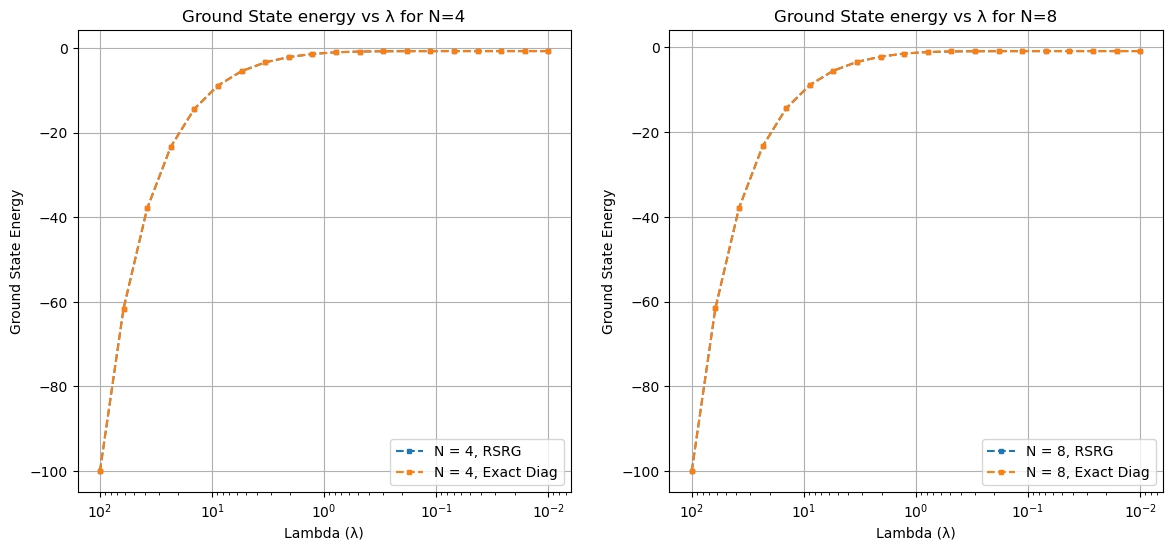

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.plot(dict_4.keys(), dict_4.values(), "s--", markersize = 3, label=f'N = 4, RSRG')
ax1.plot(dict_4_exact.keys(), dict_4_exact.values(), "s--", markersize = 3, label=f'N = 4, Exact Diag')
ax1.invert_xaxis()
ax1.set_xscale('log')  
ax1.set_xlabel('Lambda (λ)')
ax1.set_ylabel('Ground State Energy')
ax1.set_title('Ground State energy vs λ for N=4')
ax1.legend()
ax1.grid(True)


ax2.plot(dict_8.keys(), dict_8.values(), "s--", markersize = 3, label=f'N = 8, RSRG')
ax2.plot(dict_8_exact.keys(), dict_8_exact.values(), "s--", markersize = 3, label=f'N = 8, Exact Diag')
ax2.invert_xaxis()
ax2.set_xscale('log')  
ax2.set_xlabel('Lambda (λ)')
ax2.set_ylabel('Ground State Energy')
ax2.set_title('Ground State energy vs λ for N=8')
ax2.legend()
ax2.grid(True)

plt.show()


The two algorithms provide curves which perfectly overlap

## Comparison: Infinite-DMRG - meanfield

I compute the ground state energy density at the termodynamic limit $N \rightarrow \infty$ as a function of $\lambda$. <br>
I expect to have the following behaviour 
$$
e =
\begin{cases} 
-1 - \frac{\lambda^2}{4} & \text{se } \lambda \in [-2, 2] \\
-|\lambda| & \text{se } \lambda \notin [-2, 2]
\end{cases}
$$

Starting iteration 0 ...
Starting iteration 10 ...
Starting iteration 20 ...
Starting iteration 30 ...
Starting iteration 40 ...
Reached N = 102 with precision: delta = 1.2401576999110375e-05
Starting iteration 0 ...
Starting iteration 10 ...
Starting iteration 20 ...
Starting iteration 30 ...
Starting iteration 40 ...
Reached N = 102 with precision: delta = 1.2942904221269202e-05
Starting iteration 0 ...
Starting iteration 10 ...
Starting iteration 20 ...
Starting iteration 30 ...
Starting iteration 40 ...
Reached N = 102 with precision: delta = 1.3534349727173378e-05
Starting iteration 0 ...
Starting iteration 10 ...
Starting iteration 20 ...
Starting iteration 30 ...
Starting iteration 40 ...
Reached N = 102 with precision: delta = 1.41833229991839e-05
Starting iteration 0 ...
Starting iteration 10 ...
Starting iteration 20 ...
Starting iteration 30 ...
Starting iteration 40 ...
Reached N = 102 with precision: delta = 1.4898794577167251e-05
Starting iteration 0 ...
Starting iteratio

/tmp/ipykernel_9162/3742810163.py:27: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(mf_fit, list(last_gs_energy_dict.keys()), list(last_gs_energy_dict.values()), p0=initial_guess)


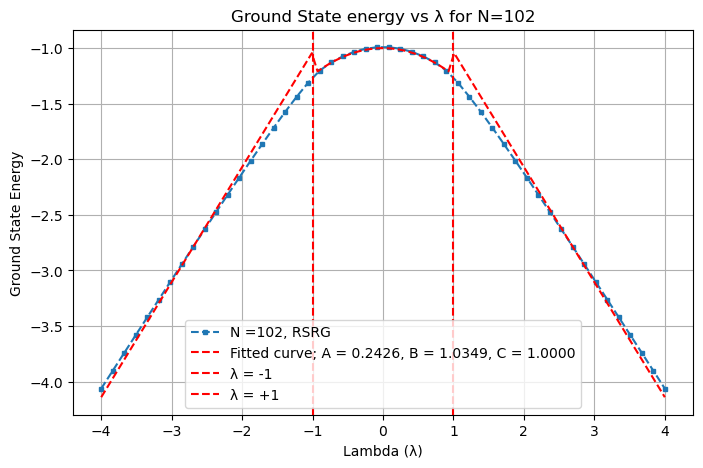

In [5]:
l_extreme = 4

l_values = np.linspace(-l_extreme, l_extreme, 50)
m_max = 1 
convergence_threshold = 0  
max_iterations = 50     # Thermodynamic limit
actual_dim = 2 + 2*max_iterations

# Infinite-DMRG
eigval_dict, last_eigvec_dict = id.update_hamiltonian(m_max, l_values, convergence_threshold, max_iterations)

# I build the dictionaries of the last GS density energies at different lambda
last_gs_energy_dict = {key: list(inner_dict.values())[-1] for key, inner_dict in eigval_dict.items()}

# Fit
def mf_fit(l_values, A, B, C):
    l_values = np.asarray(l_values)  
    e = np.where(
        (l_values >= -C) & (l_values <= C),  
        - 1 - (l_values**2)*A,
        -np.abs(l_values)*B
    )
    return e


initial_guess = [0.25, 1, 1]
params, _ = curve_fit(mf_fit, list(last_gs_energy_dict.keys()), list(last_gs_energy_dict.values()), p0=initial_guess)
A = params[0]
B = params[1]    
C = params[2]

print(f"Fitted parameters:\n A = {A:.4f}, B = {B:.4f}, C = {C:.4f}")

s_vals = np.linspace(-l_extreme, l_extreme, 100)
fitted = mf_fit(s_vals, A, B, C)


plt.figure(figsize=(8, 5))

plt.plot(last_gs_energy_dict.keys(), last_gs_energy_dict.values(), "s--", markersize = 3, label=f'N ={actual_dim}, RSRG')
plt.plot(s_vals, fitted, 'r--', label=f"Fitted curve; A = {A:.4f}, B = {B:.4f}, C = {C:.4f}")

plt.axvline(-1, color='red', linestyle='--', label='λ = -1')
plt.axvline(1, color='red', linestyle='--', label='λ = +1')
plt.xlabel('Lambda (λ)')
plt.ylabel('Ground State Energy')
plt.title(f'Ground State energy vs λ for N={actual_dim}')
plt.legend()
plt.grid(True)